In [2]:
import numpy as np
import math
from munkres import Munkres, print_matrix
from matplotlib import pyplot as plt

## Test 1: entier

Matrice des couts

In [5]:
matrix=[[1, 2, 10],
        [2, 3, 4],
        [3, 4, 1]]

In [6]:
m = Munkres()
indexes = m.compute(matrix)

In [7]:
print_matrix(matrix)

[ 1,  2, 10]
[ 2,  3,  4]
[ 3,  4,  1]


In [8]:
indexes

[(0, 0), (1, 1), (2, 2)]

In [13]:
def compute_cost(indexes, matrix):
    total = 0
    for row,columns in indexes:
        total += matrix[row][columns]
    return total

In [10]:
print("Total cost:", compute_cost(m.compute(matrix)))

TypeError: compute_cost() missing 1 required positional argument: 'matrix'

## Test 2: float

In [5]:
nb_obs = 100 # Nombre d'observations

In [6]:
# Variable 1: X1, Y1
X1 = np.random.randn(nb_obs)
Y1 = np.random.binomial(1, 0.4, nb_obs)

# Variable 2
X2 = np.random.randn(nb_obs)
Y2 = np.random.binomial(1, 0.7, nb_obs)

In [7]:
X1[5]

-1.0975681102112651

In [8]:
def compute_distances(X1, Y1, X2, Y2):
    nb_obs = len(X1)
    M = np.zeros((nb_obs, nb_obs))
    for i in range(nb_obs):
        for j in range(nb_obs):
            M[i][j]= math.sqrt((X1[i] - X2[j])**2
                               + (Y1[i] - Y2[j])**2)
    return M

In [9]:
M2 = compute_distances(X1, Y1, X2, Y2)

In [10]:
M_test = M2.copy()

In [11]:
m2 = Munkres()
indexes2 = m2.compute(M2)

In [14]:
total_cost = compute_cost(indexes2, M2)

In [15]:
total_cost

0.0

In [16]:
true_total_cost = compute_cost(indexes2, M_test)
print(true_total_cost)

31.7822072805


## Distance entre plusieurs lois

In [31]:
n_obs = 100
# Variable 1: X1, Y1
X1 = np.random.normal(2, 1, nb_obs)
Y1 = np.random.binomial(1, 0.4, nb_obs)

# Variable 2
X2 = np.random.normal(3, 1, nb_obs)
Y2 = np.random.binomial(1, 0.7, nb_obs)

In [18]:
M_distance = compute_distances(X1, Y1, X2, Y2)
m = Munkres()
M = M_distance.copy()
indexes = m.compute(M)

total_cost = compute_cost(indexes, M_distance)
print(total_cost)

109.999137253


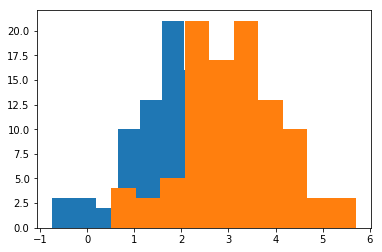

In [19]:
plt.hist(X1)
plt.hist(X2)
plt.show()

In [32]:
# Variable 3
X3 = np.random.normal(4, 1, nb_obs)
Y3 = np.random.binomial(1, 0.7, nb_obs)

In [21]:
def earth_move_distance(X1, Y1, X2, Y2):
    M_distance = compute_distances(X1, Y1, X2, Y2)
    m = Munkres()
    M = M_distance.copy()
    indexes = m.compute(M)

    total_cost = compute_cost(indexes, M_distance)
    return total_cost, M_distance, indexes

In [33]:
total_cost, M_distance, indexes = earth_move_distance(X1, Y1, X2, Y2)
print("Total cost 1 - 2:", total_cost/nb_obs)

Total cost 1 - 2: 1.20236968813


In [34]:
total_cost, M_distance, indexes = earth_move_distance(X1, Y1, X3, Y3)
print("Total cost 1 - 3:", total_cost/nb_obs)

Total cost 1 - 3: 1.91751123167


In [35]:
total_cost, M_distance, indexes = earth_move_distance(X2, Y2, X3, Y3)
print("Total cost 2 - 3:", total_cost/nb_obs)

Total cost 2 - 3: 0.738769868626


Lorsque le nombre des observations est assez grand, la distance entre 2 et 3 et entre 1 et 2 doit être à peu près la même
alors que la distance entre 1 et 3 doit être à peu près deux fois la distance entre 1 et 2

#### Distance = total_cost / nb_observations

- Temps de calcul: O(n^3) dans le pire des cas
- Le résultat est l'optimum

http://csclab.murraystate.edu/~bob.pilgrim/445/munkres.html

In [37]:
x = np.random.normal(0,1, 200)
x2 = np.random.normal(2,1, 150)

In [38]:
def dist(x, y):
    M = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            M[i][j] = abs(x[i])
            
        
... 

M_distance = dist(x, x2)
m = Munkres()
M = M_distance.copy()
indexes = m.compute(M)

total_cost = compute_cost(indexes, M_distance)

NameError: name 'distance' is not defined